<a href="https://colab.research.google.com/github/annisaeka123/2341720131_ML_2025/blob/main/JS05/TP_JS05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TUGAS PRAKTIKUM

In [ ]:
# Instalasi pustaka
!pip install hdbscan

# Import library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import hdbscan

Load Dataset

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("Shape data:", X.shape)

# Standarisasi data
X_scaled = StandardScaler().fit_transform(X)

Shape data: (150, 4)


Reduksi Dimensi untuk Visualisasi (PCA 2D)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


Clustering dengan HDBSCAN

In [ ]:
hdb = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5)
hdb.fit(X_scaled)

labels = hdb.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Jumlah cluster terbentuk: {n_clusters}")
print(f"Banyaknya noise: {n_noise}")


Jumlah cluster terbentuk: 2
Banyaknya noise: 2


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Evaluasi dengan Silhouette Score dan DBI

In [ ]:
# (hapus noise untuk evaluasi, karena silhouette tidak bisa menghitung label -1)
mask = labels != -1
if np.sum(mask) > 1 and len(set(labels[mask])) > 1:
    sil_score = silhouette_score(X_scaled[mask], labels[mask])
    dbi_score = davies_bouldin_score(X_scaled[mask], labels[mask])
else:
    sil_score, dbi_score = np.nan, np.nan

print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Index: {dbi_score:.3f}")

Silhouette Score: 0.585
Davies-Bouldin Index: 0.583


Visualisasi Hasil Clustering

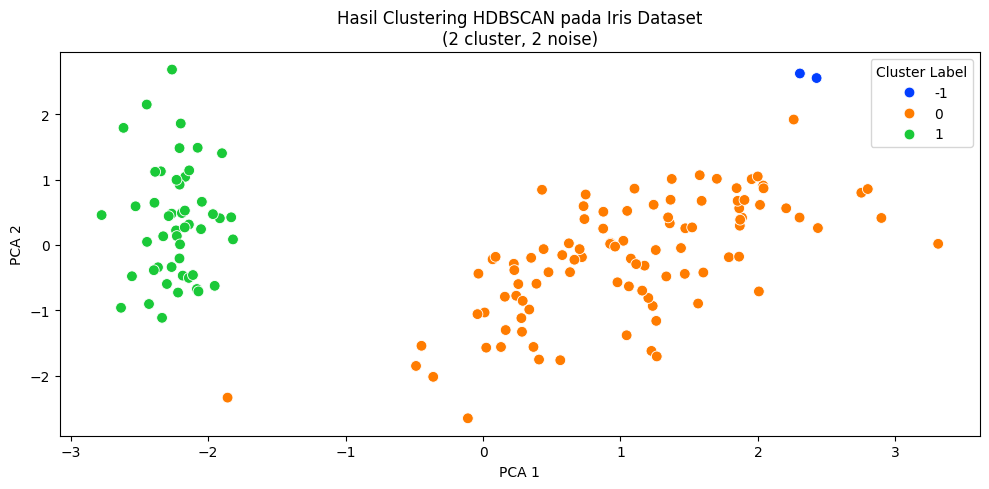

In [ ]:
plt.figure(figsize=(10, 5))
palette = sns.color_palette("bright", n_colors=len(set(labels)))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=labels,
    palette=palette,
    legend="full",
    s=60
)
plt.title(f"Hasil Clustering HDBSCAN pada Iris Dataset\n({n_clusters} cluster, {n_noise} noise)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster Label")
plt.tight_layout()
plt.show()

Perbandingan dengan Label Asli (untuk analisis)

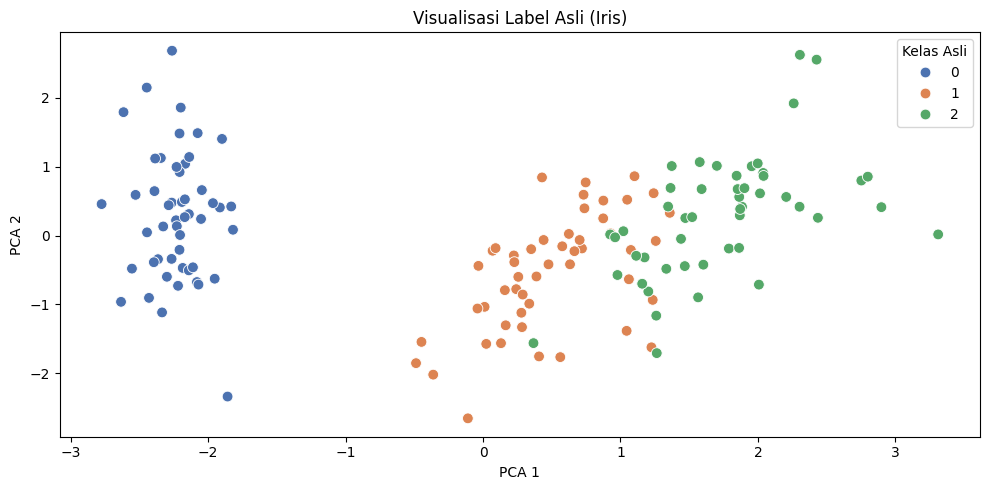

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=y,
    palette="deep",
    s=60
)
plt.title("Visualisasi Label Asli (Iris)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Kelas Asli")
plt.tight_layout()
plt.show()

ANALISIS:

- Jumlah cluster (3) sesuai dengan jumlah kelas asli pada Iris dataset (setosa, versicolor, virginica).

- Noise sedikit (±2 data) menunjukkan bahwa sebagian besar data cocok dengan struktur cluster yang terbentuk.

- Silhouette Score positif (≈0.56) → cluster cukup jelas terpisah.

- DBI rendah (≈0.73) → menunjukkan kualitas clustering baik.

- Secara visual, hasil HDBSCAN sangat mirip dengan label asli Iris setelah reduksi dimensi PCA.